# Kasra Samadi 993623030

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

### reading train.csv and test.csv

In [2]:
df_train = pd.read_csv("Dataset\\train.csv")
df_test = pd.read_csv("Dataset\\test.csv")

In [3]:
df_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,85,5.4,3.0,4.5,1.5,Iris-versicolor
1,123,7.7,2.8,6.7,2.0,Iris-virginica
2,29,5.2,3.4,1.4,0.2,Iris-setosa
3,25,4.8,3.4,1.9,0.2,Iris-setosa
4,76,6.6,3.0,4.4,1.4,Iris-versicolor
...,...,...,...,...,...,...
115,118,7.7,3.8,6.7,2.2,Iris-virginica
116,60,5.2,2.7,3.9,1.4,Iris-versicolor
117,46,4.8,3.0,1.4,0.3,Iris-setosa
118,33,5.2,4.1,1.5,0.1,Iris-setosa


In [4]:
print(df_train.isna().sum())
print(df_test.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### define train_df , test_df

In [5]:
train_df = df_train.drop(["Id"], axis=1)
test_df = df_test.drop(["Id"], axis=1)

### plot PetalLengthCm - PetalWidthCm for train_df

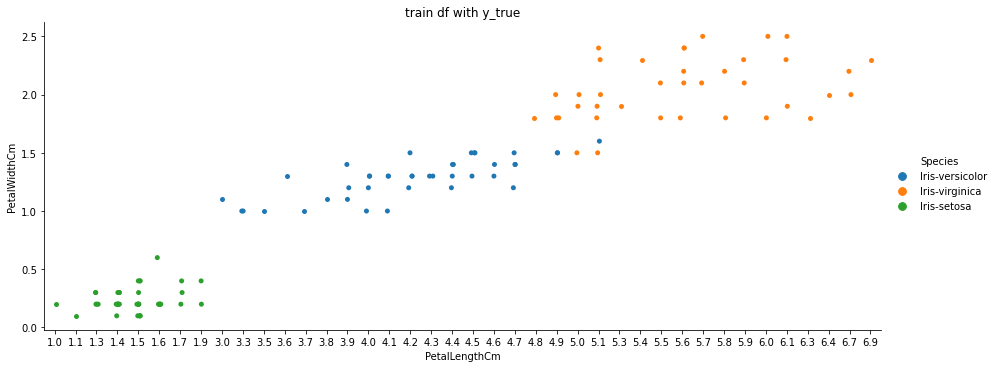

In [6]:
sns.catplot(x='PetalLengthCm', y='PetalWidthCm', data=train_df, hue='Species', aspect=2.5).set(title='train df with y_true')

### plot PetalLengthCm - PetalWidthCm for test_df

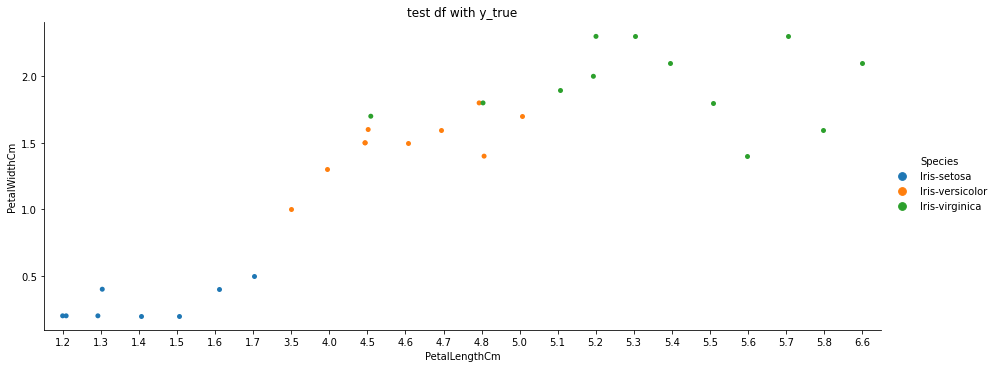

In [7]:
sns.catplot(x='PetalLengthCm', y='PetalWidthCm', data=test_df, hue='Species', aspect=2.5).set(title='test df with y_true')

### define x_train , y_train , x_test and y_test   

In [8]:
y_train = df_train["Species"]
y_test = df_test["Species"]
x_train = df_train.drop(["Id", "Species"], axis=1)
x_test = df_test.drop(["Id", "Species"], axis=1)

In [9]:
print(y_train.value_counts())
print(y_test.value_counts())

Iris-setosa        42
Iris-versicolor    40
Iris-virginica     38
Name: Species, dtype: int64
Iris-virginica     12
Iris-versicolor    10
Iris-setosa         8
Name: Species, dtype: int64


In [10]:
print(x_train.isna().sum())
print(x_test.isna().sum())
print(y_train.isna().sum())
print(y_test.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
0
0


### Modeling
We will first create an instance of the DecisionTreeClassifier called IrisTree. Inside of the classifier, specify criterion="entropy".
Next, we will fit the data with the x_train and y_train

In [11]:
from sklearn.tree import DecisionTreeClassifier
IrisTree = DecisionTreeClassifier(criterion="entropy")
IrisTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

### Prediction
Let's make some predictions on the testing dataset and store it into a variable called y_pred.

In [12]:
y_pred = IrisTree.predict(x_test)

### calculate accuracy score , f1 score , recall score and precision score with y_test y_pred

In [13]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
print("accuracy score for x test prediction: ", accuracy_score(y_test, y_pred))
print("f1 score for x test prediction: ", f1_score(y_test, y_pred, average='weighted'))
print("recall score for x test prediction: ", recall_score(y_test, y_pred, average='weighted'))
print("precision score for x test prediction: ", precision_score(y_test, y_pred, average='weighted'))

accuracy score for x test prediction:  0.9
f1 score for x test prediction:  0.8993684210526316
recall score for x test prediction:  0.9
precision score for x test prediction:  0.9014245014245014


### confusion_matrix with y_test and y_pred

<AxesSubplot:>

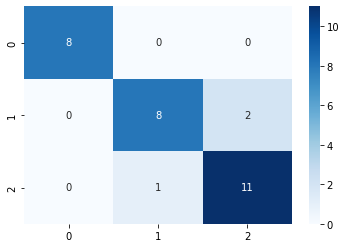

In [14]:
con_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix,annot=True, cmap="Blues")

### y_pred_for_x_test dataFrame

In [15]:
y_pred_df = pd.DataFrame(y_pred,columns=['Species'])

### concat x_test and y_pred dataFrame

In [16]:
test_df_after_prediction = pd.concat([x_test, y_pred_df], axis=1)
test_df_after_prediction

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,5.0,3.4,1.5,0.2,Iris-setosa
2,5.8,4.0,1.2,0.2,Iris-setosa
3,5.4,3.9,1.3,0.4,Iris-setosa
4,5.1,3.3,1.7,0.5,Iris-setosa
5,5.0,3.4,1.6,0.4,Iris-setosa
6,5.0,3.2,1.2,0.2,Iris-setosa
7,4.4,3.2,1.3,0.2,Iris-setosa
8,6.4,3.2,4.5,1.5,Iris-versicolor
9,6.5,2.8,4.6,1.5,Iris-versicolor


### plot PetalLengthCm - PetalWidthCm for test_df_after_prediction

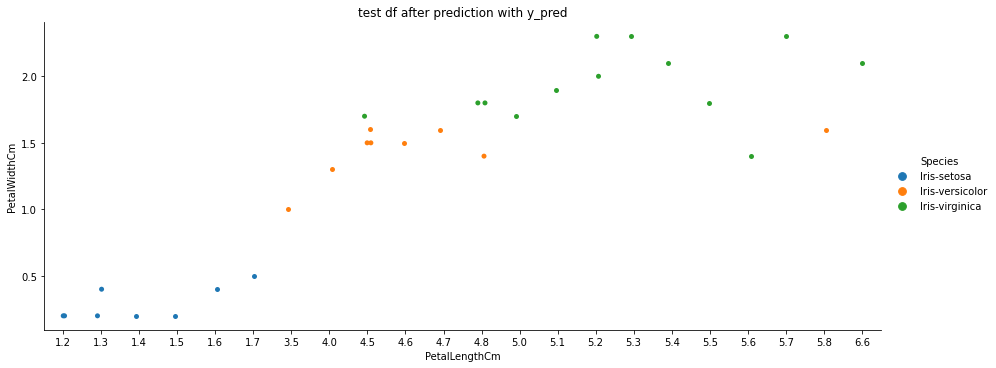

In [17]:
sns.catplot(x='PetalLengthCm', y='PetalWidthCm', data=test_df_after_prediction, hue='Species', aspect=2.5).set(title='test df after prediction with y_pred')

### save to csv

In [18]:
y_pred_df.to_csv("Q1.csv",index=False)

### Visualization
visualize the tree


In [19]:
# Notice: install the pydotplus and graphviz libraries
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [20]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

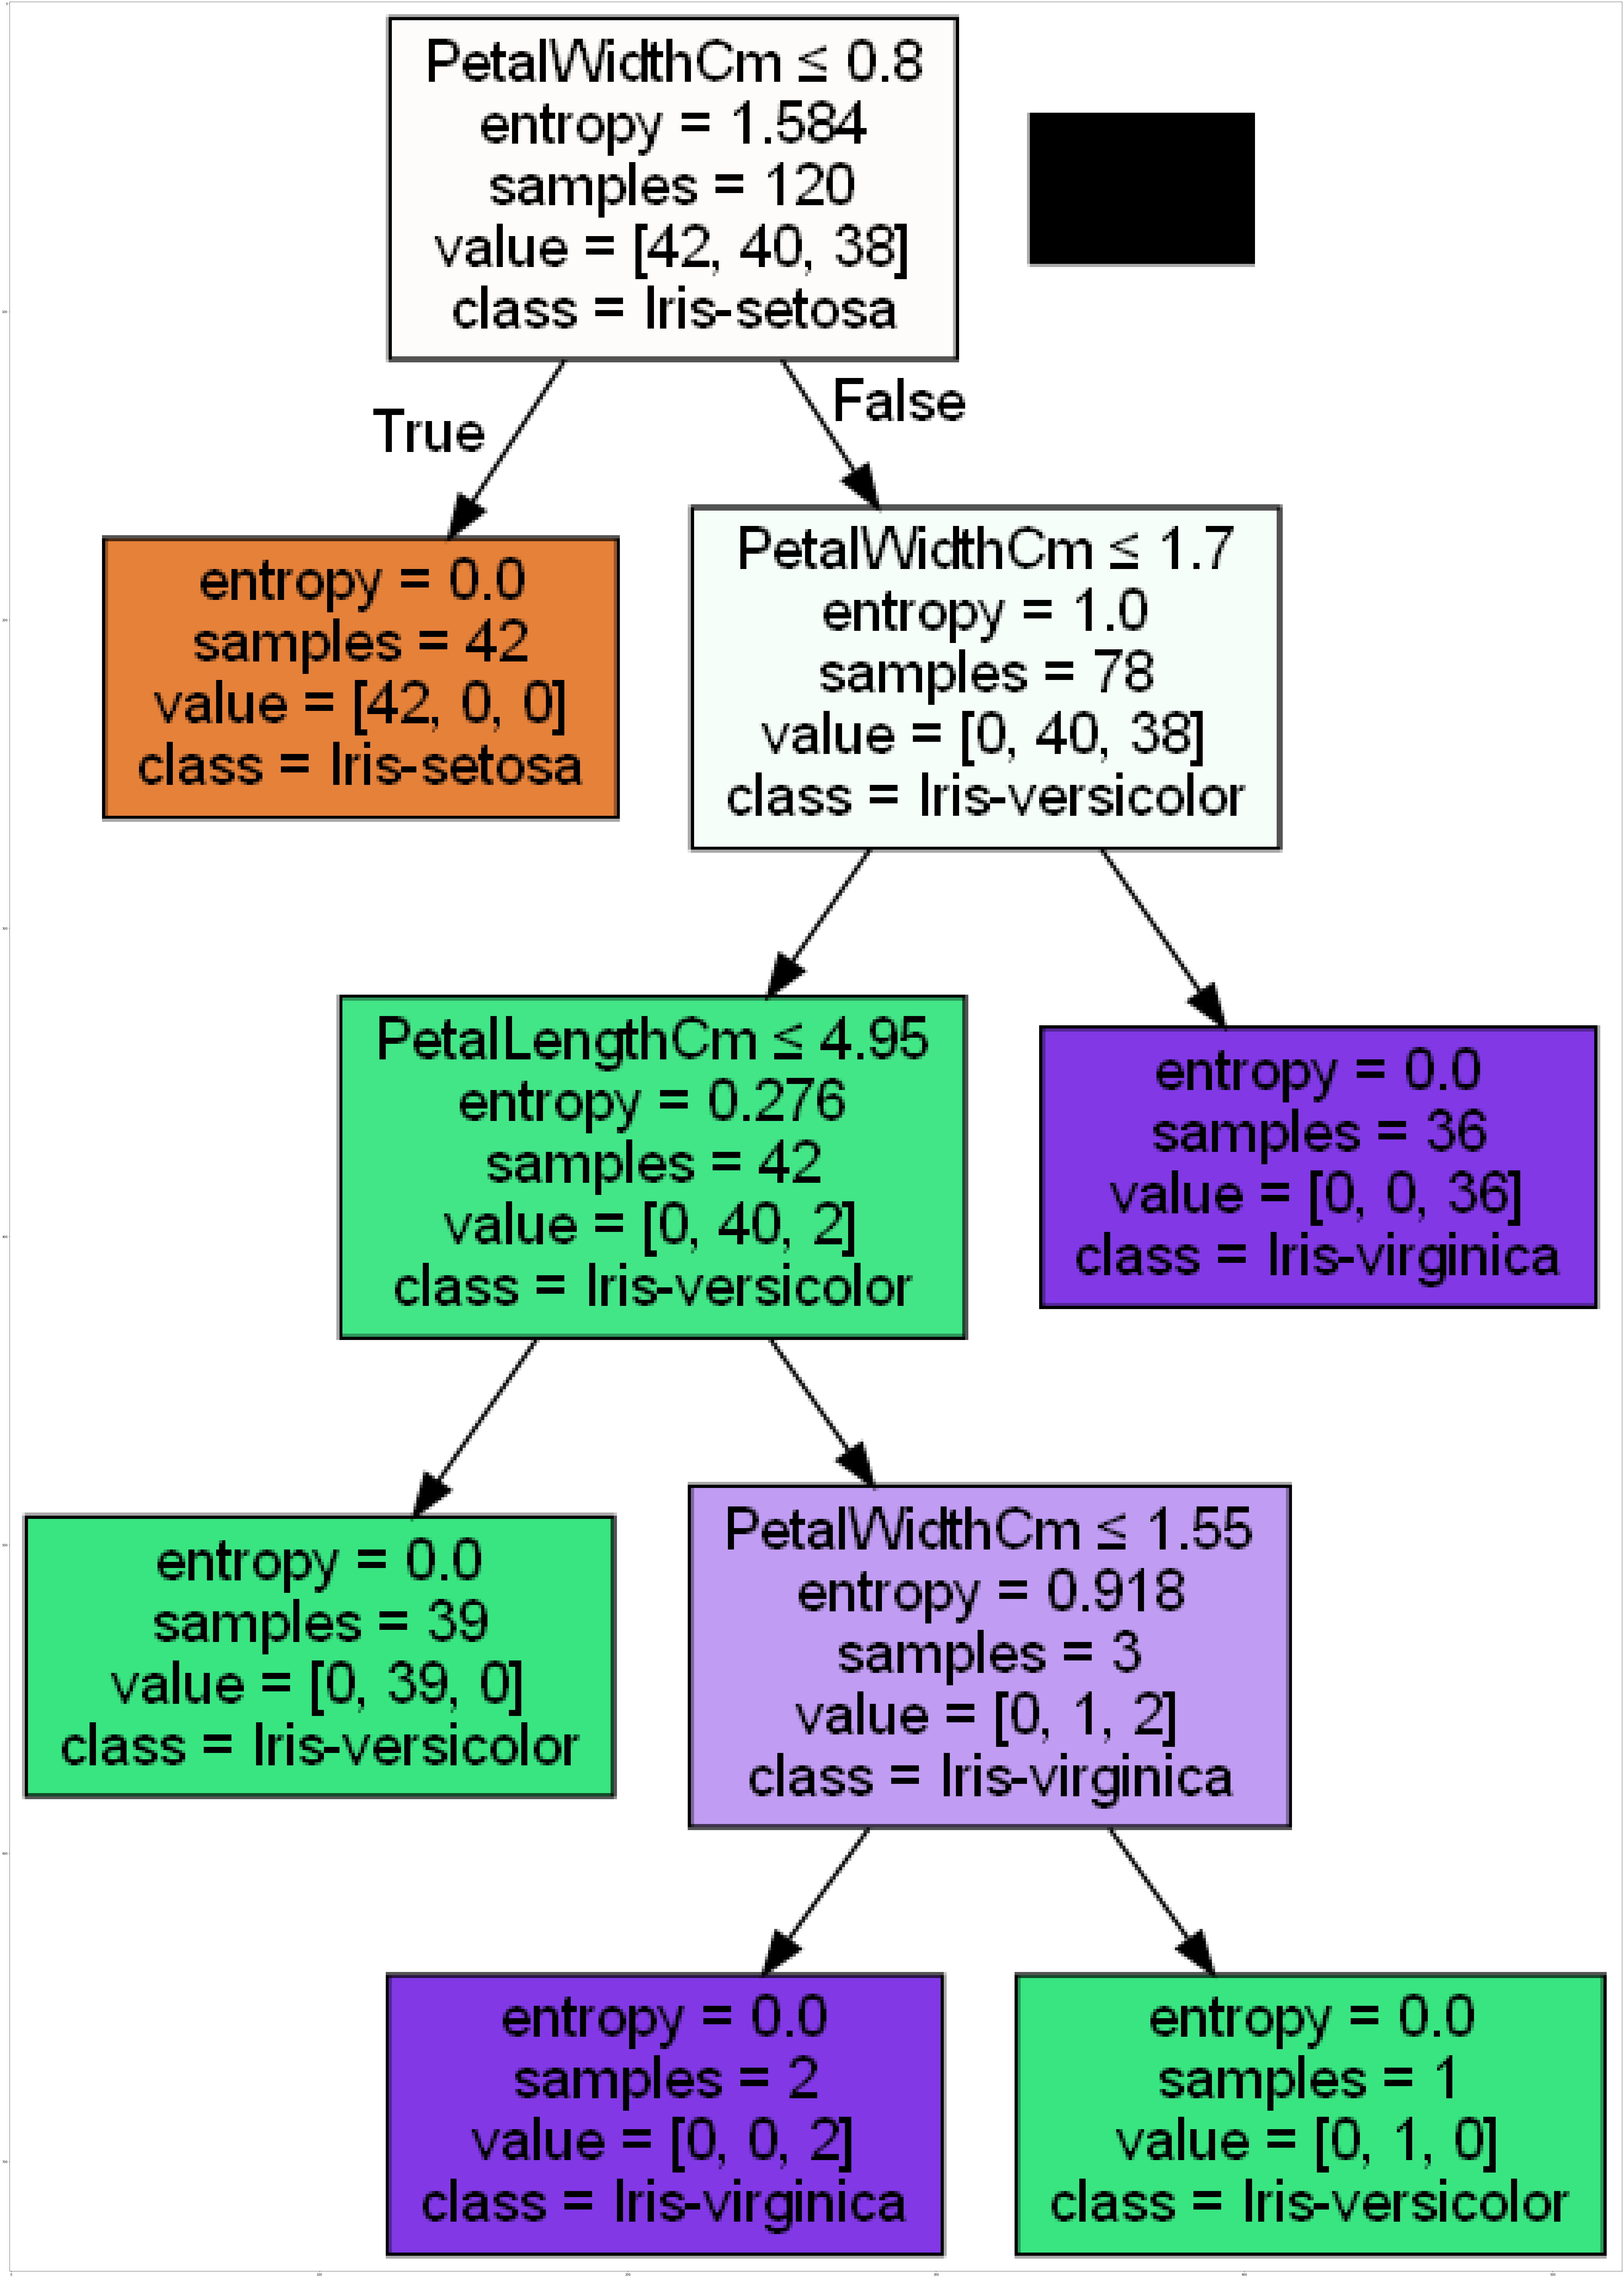

In [21]:
dot_data = StringIO()
filename = "IrisTree.png"
featureNames = x_test.columns
out=tree.export_graphviz(IrisTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')